In [1]:
!pip install spacy #installs spacy
!pip install newsapi-python #installs newsapi library
!python -m spacy download en_core_web_lg #downloads the largest spaCy English Language Model

^C


In [2]:
from newsapi import NewsApiClient
import pickle
import pandas as pd
import spacy

In [3]:
nlp_eng = spacy.load('en_core_web_lg') #stores the spaCy model and loads it into a variable called 'nlp_eng'
newsapi = NewsApiClient (api_key='b506f544bca14e57bae6218fb5f2a8e2') #set newsapi as a variable for the apikey

In [18]:
temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-25', to='2022-03-24', sort_by='relevancy')
#articles from past 30 days

In [5]:
filename = 'articlesCOVID.pckl'
pickle.dump(temp, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [6]:
df = pd.DataFrame(temp['articles']) #creates a pandas dataframe of the articles

In [7]:
import nltk
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter

In [8]:
tokenizer = RegexpTokenizer(r'\w+')

In [9]:
def get_keywords_eng(token): #function to receive the text and identify part-of-speech tagging and match it with the keywords
    result = []
    punctuation = string.punctuation
    stop_words = stopwords.words('english')
    
    for i in token: #extracts verbs, nouns, and proper nouns
        if (i in stop_words):
            continue
        else:
            result.append(i)
    return result

In [12]:
results = []

In [13]:
for content in df.content.values: #searches through contents of articles
    content = tokenizer.tokenize(content)
    results.append([x[0] for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results #adds a new column to the dataframe called keywords

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

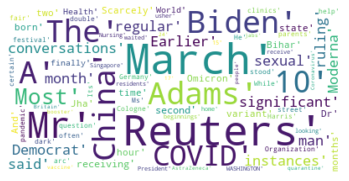

In [15]:
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
df

,source,author,title,description,url,urlToImage,publishedAt,content,keywords
0,"{'id': None, 'name': 'New York Times'}",Joseph Berger,"Rabbi Chaim Kanievsky, Venerated Talmudic Scho...","He initially insisted, “Canceling Torah study ...",https://www.nytimes.com/2022/03/18/obituaries/...,https://static01.nyt.com/images/2022/03/19/obi...,2022-03-18T20:26:55Z,Most significant was his ruling that instances...,"[Most, significant, ruling, instances, sexual]"
1,"{'id': None, 'name': 'New York Times'}",Emma G. Fitzsimmons,Can Eric Adams Cheerlead New Yorkers Past the ...,The mayor is singularly focused on bringing ba...,https://www.nytimes.com/2022/03/20/nyregion/pa...,https://static01.nyt.com/images/2022/03/20/nyr...,2022-03-20T16:11:17Z,"Mr. Adams, a Democrat, has had regular convers...","[Mr, Adams, Democrat, regular, conversations]"
2,"{'id': None, 'name': 'New York Times'}",Emma G. Fitzsimmons,"Preschoolers Can Shed Their Masks, Mayor Adams...",New York City plans to end the mask requiremen...,https://www.nytimes.com/2022/03/22/nyregion/ma...,https://static01.nyt.com/images/2022/03/22/nyr...,2022-03-22T18:11:14Z,"Earlier this month, when Mr. Adams eliminated ...","[said, Earlier, month, Mr, Adams]"
3,"{'id': None, 'name': 'New York Times'}",The New York Times,Moderna Asks F.D.A. to Authorize a Second Boos...,The request is significantly broader than the ...,https://www.nytimes.com/live/2022/03/18/world/...,https://static01.nyt.com/images/2022/03/17/mul...,2022-03-18T09:08:37Z,A man receiving a second booster of a coronavi...,"[Moderna, A, man, receiving, second]"
4,"{'id': None, 'name': 'New York Times'}",The New York Times,China Reports Its First Covid Deaths in Over a...,The two fatalities are the first coronavirus d...,https://www.nytimes.com/live/2022/03/19/world/...,https://static01.nyt.com/images/2022/04/18/wor...,2022-03-19T13:37:04Z,Scarcely two months after the Omicron variant ...,"[Scarcely, two, months, Omicron, variant]"
5,"{'id': None, 'name': 'New York Times'}",Sheryl Gay Stolberg,"Can Ashish Jha, ‘A Comforting Voice,’ Tamp Dow...","Dr. Jha, the new White House coronavirus respo...",https://www.nytimes.com/2022/03/20/us/politics...,https://static01.nyt.com/images/2022/03/18/us/...,2022-03-20T09:00:09Z,"Dr. Jha was born in Bihar, a state in eastern ...","[Dr, Jha, born, Bihar, state]"
6,"{'id': None, 'name': 'New York Times'}",Remy Tumin,"Ukraine, Coronavirus, Pompeii: Your Friday Eve...",Here’s what you need to know at the end of the...,https://www.nytimes.com/2022/03/11/briefing/uk...,https://static01.nyt.com/images/2022/03/11/mul...,2022-03-11T23:33:10Z,"10. And finally, if he could turn back time \r...","[time, hour, 10, And, finally]"
7,"{'id': None, 'name': 'New York Times'}",The New York Times,"2 Years After Declaring Pandemic, W.H.O. Urges...",Exactly two years after saying that the corona...,https://www.nytimes.com/live/2022/03/11/world/...,https://static01.nyt.com/images/2022/03/11/wor...,2022-03-11T09:29:44Z,"The World Health Organization, often criticize...","[The, World, Health, Organization, often]"
8,"{'id': None, 'name': 'New York Times'}",The New York Times,Rise of Omicron Subvariant in Europe Could Be ...,Past coronavirus surges in Europe have predict...,https://www.nytimes.com/live/2022/03/17/world/...,https://static01.nyt.com/images/2022/03/17/mul...,2022-03-17T09:29:24Z,"A street festival in Cologne, Germany. Coronav...","[A, street, festival, Cologne, Germany]"
9,"{'id': None, 'name': 'New York Times'}",Juliet Macur,"Knocked Down by Covid in Beijing, Vincent Zhou...",Zhou missed the men’s individual event at the ...,https://www.nytimes.com/2022/03/18/sports/olym...,https://static01.nyt.com/images/2022/03/17/mul...,2022-03-19T04:29:38Z,Its a fair question. He double masked. He wore...,"[He, Its, fair, question, double]"
